# CNN model trained on MNIST dataset for handwritten digit classification

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

## Loading dataset
The MNIST dataset is a part of keras datasets which is split into Train and Test with 60000 and 10000 image each.

In [ ]:
from keras.datasets import mnist
train,test= mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


The Train dataset contains 60000 images and it's corresponding labels. They're stored seperately in two variables.

In [ ]:
data, label = train

In [ ]:
len(data)

60000

0


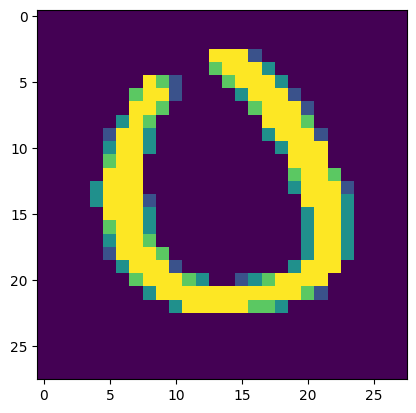

In [ ]:
var=10010
plt.imshow(data[var])
print(label[var])

Extracting the unique lables to determine the true labels and therefore determine the total no. of classes.

In [ ]:
true_labels=list(set(label))
true_labels.sort()
true_labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Converting data and label to a numpy array for data processing.

In [ ]:
x=np.array(data)
y=np.array(label)

Reshaping 3D tensor (No. of images, Width, Height) into 4D tensor (No. of images, Width, Height, Pixel) nad normalising it.

In [ ]:
x=x.reshape(-1,28,28,1) # -1 is used to determine the value automatically

In [ ]:
x=x/255 # Normalising the values b/w 0 and 1

In [ ]:
x.shape
print(x[0].shape)
# print(x[0])

(28, 28, 1)


2


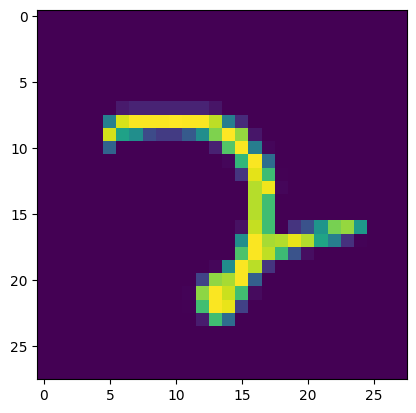

In [ ]:
var=8966
plt.imshow(x[var])
print(y[var])

## Building the Model
We use the keras Sequential model to create our model. We add our desired layers to create a custom CNN. The Sequential model automatically feed forwards output of previous layer to next layer.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation,Conv2D,Flatten,MaxPool2D
from keras.callbacks import EarlyStopping

In [ ]:
inputShape=x[0].shape # Input shape to model
classes=len(true_labels) # No. of output classes

In [ ]:
mods=Sequential()
mods.add(Conv2D(32,(5,5),activation='relu',input_shape=inputShape,strides=(1,1),padding='same')) # Input layer
mods.add(Conv2D(64,(3,3),activation='relu',strides=(1,1),padding='same'))
mods.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
mods.add(Dropout(0.2))
mods.add(Conv2D(128,(3,3),activation='relu',strides=(1,1),padding='same'))
mods.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
mods.add(Flatten())
mods.add(Dense(256,activation='relu'))
mods.add(Dense(classes,activation='softmax')) # Output layer

In [ ]:
mods.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy']) # Compiling model with loss function and optimiser

In [ ]:
mods.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                    

In [ ]:
early_stopping=EarlyStopping(min_delta=0.001, patience=2, restore_best_weights=True) # configuring early stopping

In [ ]:
batch_size=64
epochs=20

We train the model for 20 epochs by diving the training dataset into 80%-20% training-validation with early stopping to prevent overfitting. We store the training history to plot validation graph.

In [ ]:
history = mods.fit(x,y,batch_size=batch_size,epochs=epochs,validation_split=0.2,callbacks=[early_stopping]) # Training model

Epoch 1/20
750/750 [==============================] - 23s 9ms/step - loss: 0.1367 - accuracy: 0.9579 - val_loss: 0.0469 - val_accuracy: 0.9843
Epoch 2/20
750/750 [==============================] - 6s 8ms/step - loss: 0.0446 - accuracy: 0.9860 - val_loss: 0.0358 - val_accuracy: 0.9898
Epoch 3/20
750/750 [==============================] - 6s 8ms/step - loss: 0.0288 - accuracy: 0.9908 - val_loss: 0.0467 - val_accuracy: 0.9847
Epoch 4/20
750/750 [==============================] - 6s 9ms/step - loss: 0.0227 - accuracy: 0.9928 - val_loss: 0.0355 - val_accuracy: 0.9898


## Testing model
We use the 10000 test images to test our model.

In [ ]:
a,b=test # Unpacking data and labels

The softmax returns a list of probabilites. We select the index with the highest probability and use it with the true labels to find the output of the model.

True: 8
1/1 [==============================] - 0s 178ms/step
[1.1211965e-05 4.9057576e-07 4.1145468e-06 3.5010220e-07 3.5935252e-06
 8.6767441e-06 7.7433590e-08 8.8286333e-06 9.9664778e-01 3.3149116e-03]
Predict: 8


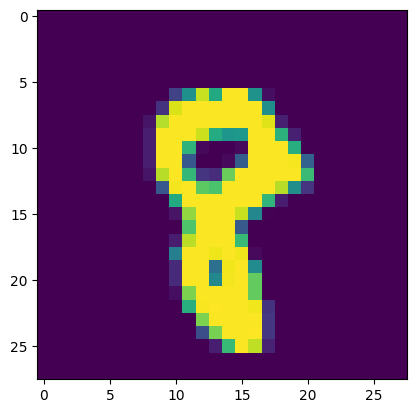

In [ ]:
var=7951
plt.imshow(a[var])
print("True:",b[var])
temp = mods.predict(a[var].reshape(-1,28,28,1)/255) # passing processed image to the model
print(temp[0]) # returns a list containing a list of probabilities as returned by softmax
print("Predict:", true_labels[np.argmax(temp[0])]) # Extracting the index with the highest probability and using it with true_labels

Processing the test data.

In [ ]:
a_new = np.array(a)
a_new = a_new.reshape(-1, 28, 28, 1)
a_new = a_new/255

Now performing prediction for all 10000 images.

In [ ]:
pred = list(map(lambda x: true_labels[np.argmax(x)], mods.predict(a_new))) # mapping probabilites to labels

313/313 [==============================] - 1s 2ms/step


In [ ]:
pred[var]

8

## Training visualisation

:Converting the history of model training into a pandas dataframe.

In [ ]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

Loss VS. Val_loss with minimum validation loss.


Minimum validation loss: 0.03553895652294159


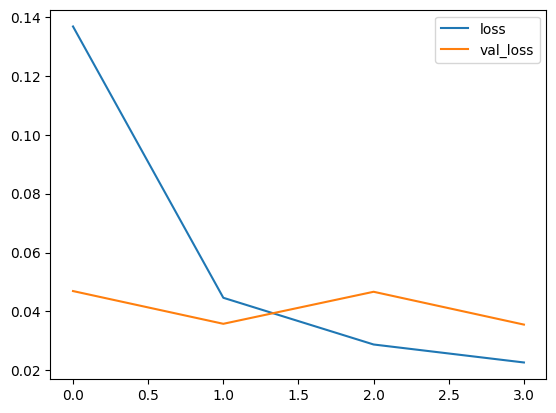

In [ ]:
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Accuracy VS. Val_accuracy with maximum validation accuracy.

Maximum validation accuracy: 0.9898333549499512


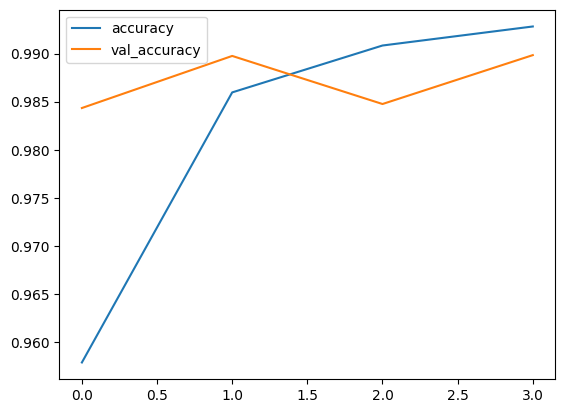

In [ ]:
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
print("Maximum validation accuracy: {}".format(history_df['val_accuracy'].max()))

Accuracy score.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(b, pred)

0.9919

Confusion matrix.

<Axes: >

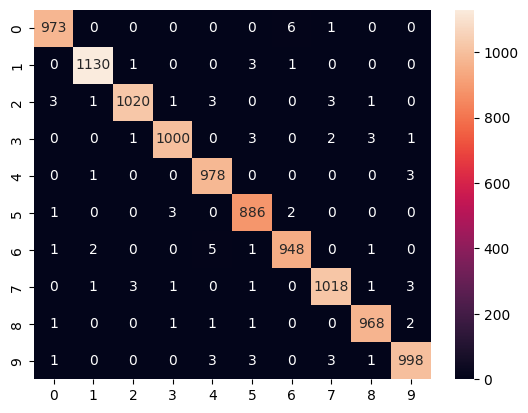

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(b, pred), annot=True, fmt='d')